In [1]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt



gdrive_path = '/content/gdrive/MyDrive/Robust DevOps: Chiemsee/sorted-results'
gdrive_path_root = '/content/gdrive/MyDrive/Robust DevOps: Chiemsee'



# This will mount your Google Drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


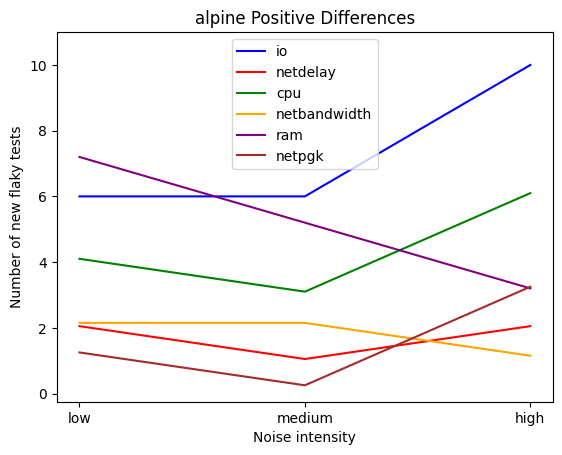

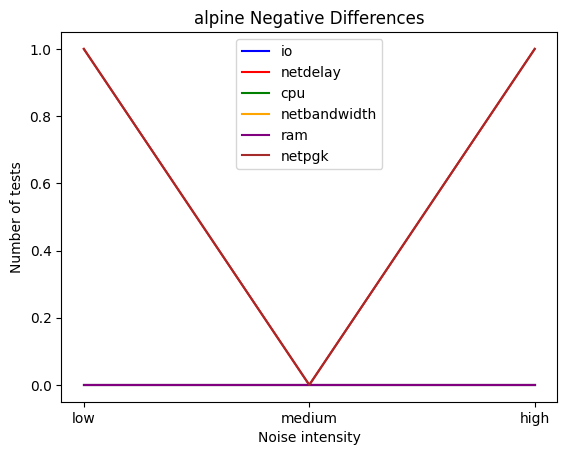

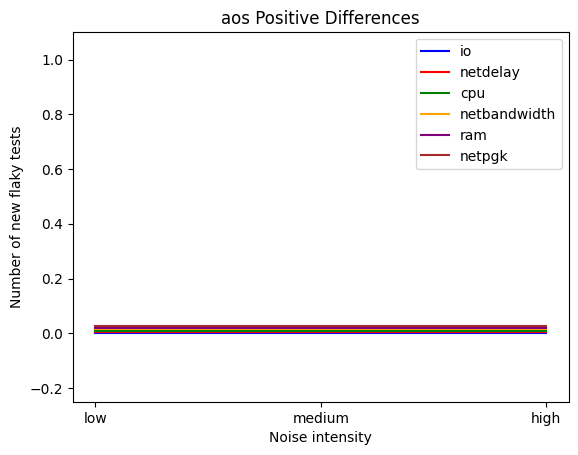

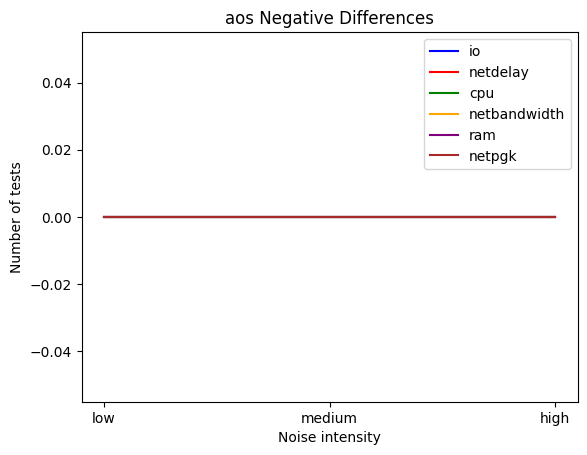

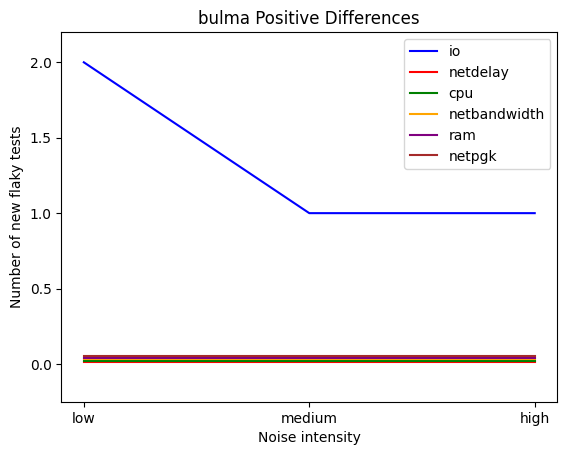

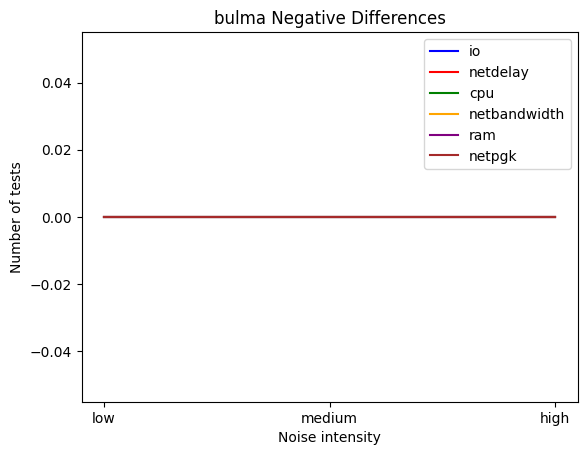

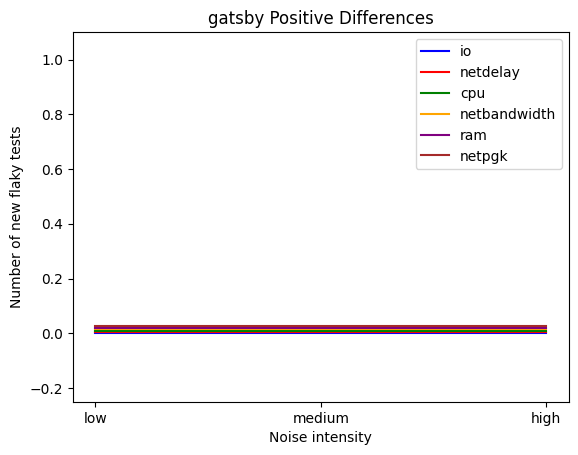

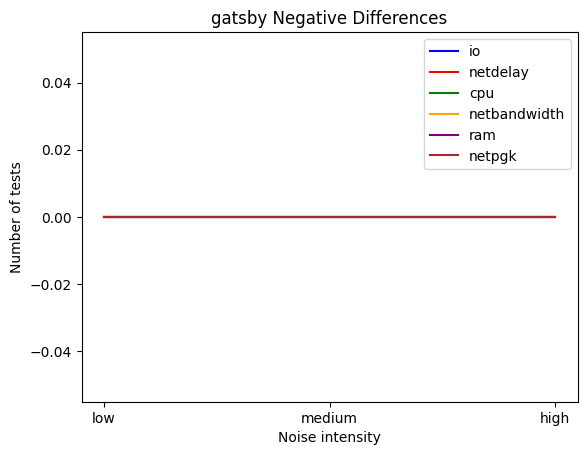

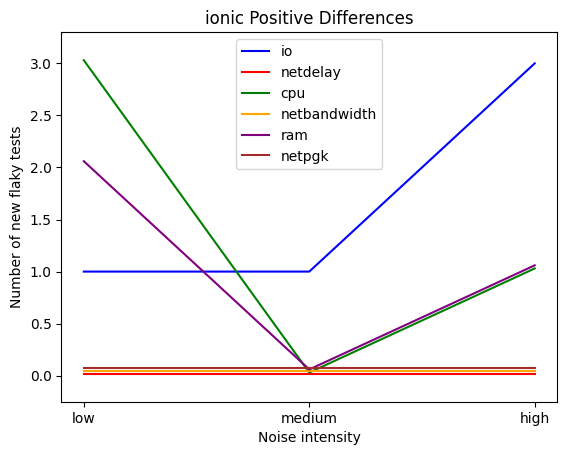

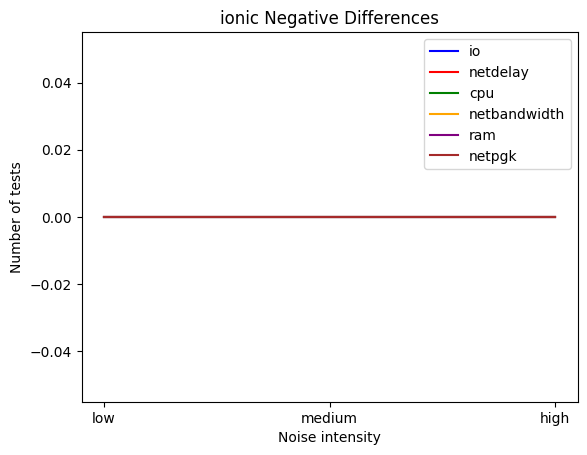

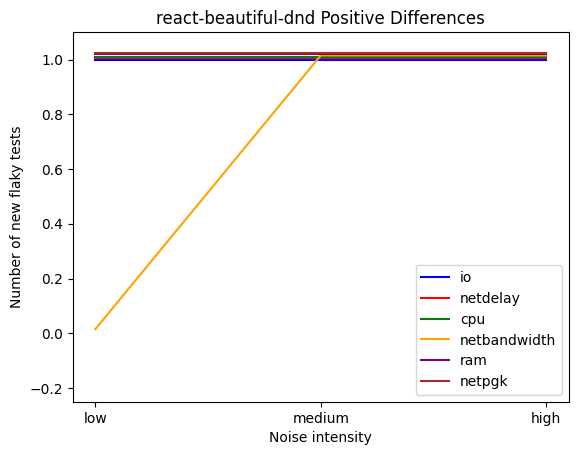

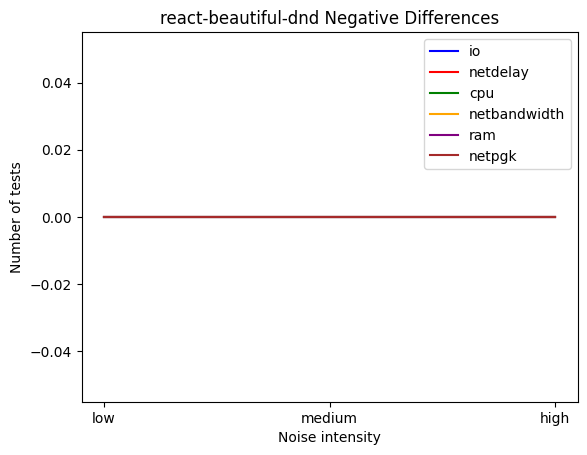

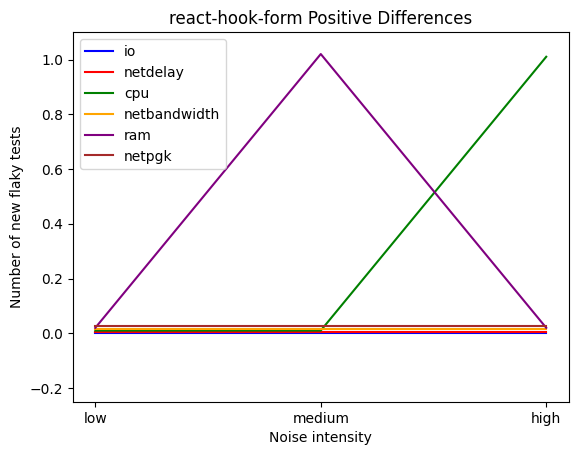

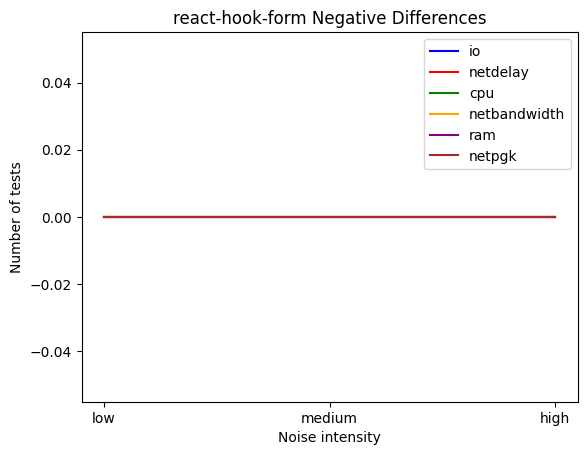

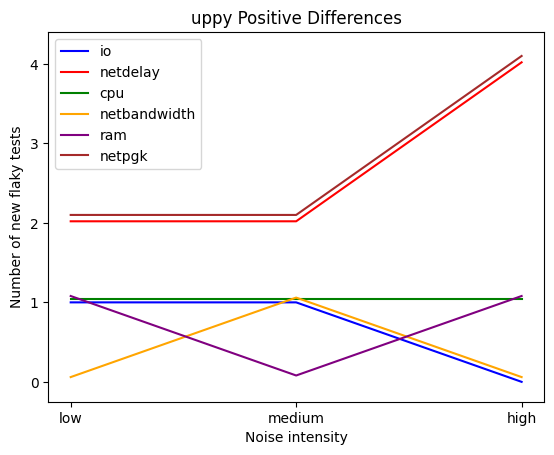

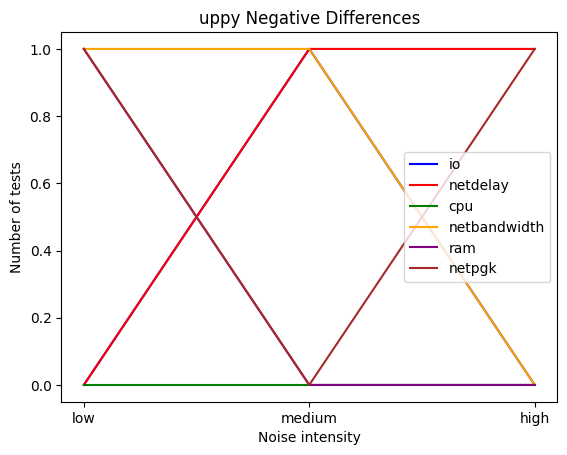

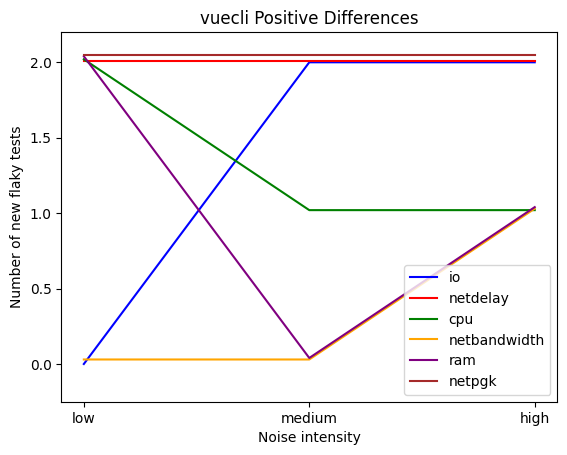

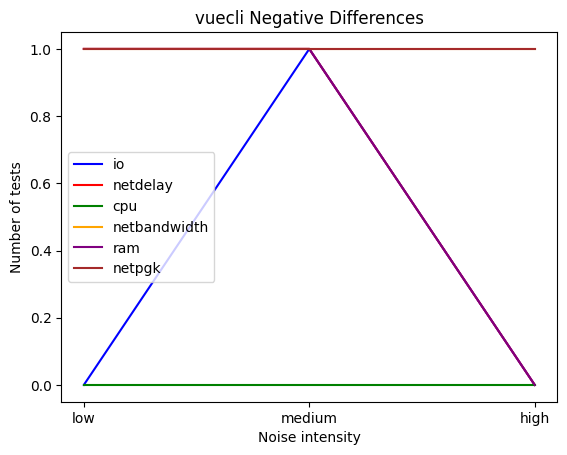

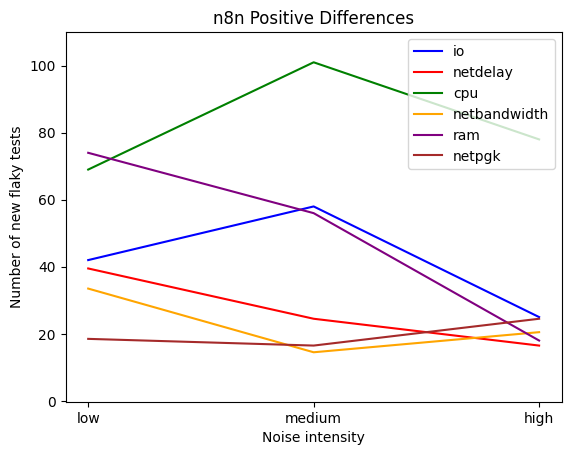

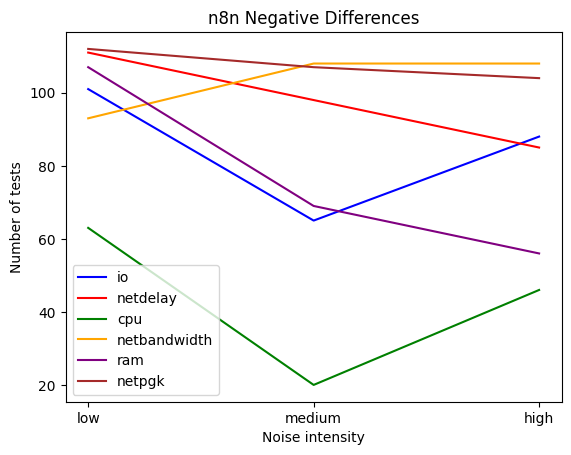

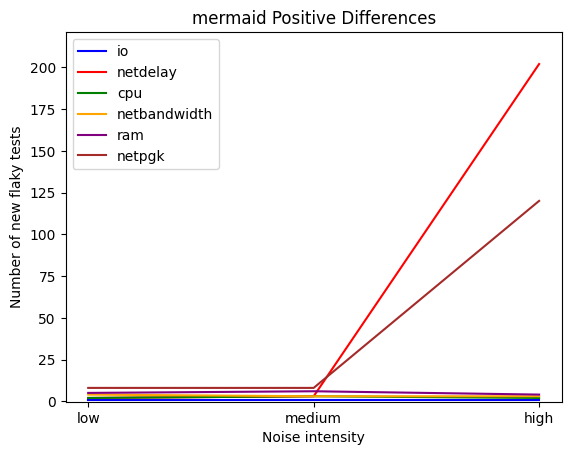

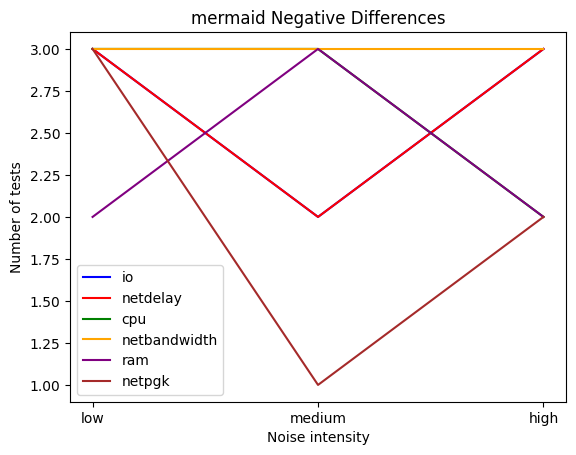

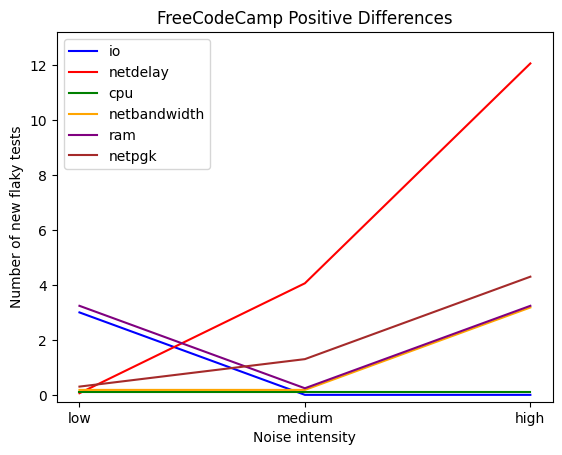

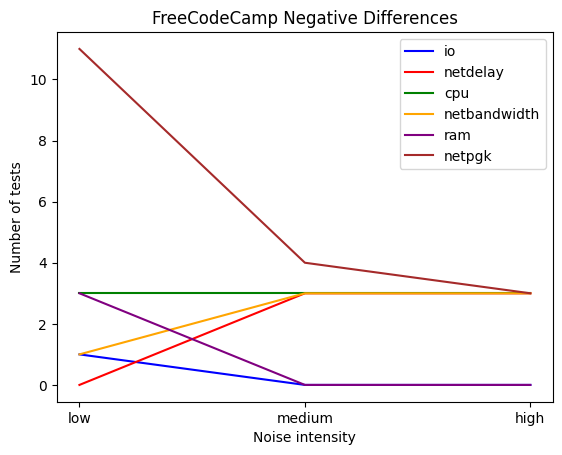

In [2]:
graphs_folder = os.path.join(gdrive_path_root, 'graphs')

# Define the column names
column_names = [
    "noise_type",
    "positive",
    "ratio_positive",
    "negative",
    "ratio_negative",
    "zero",
    "ratio_zero"
]

def generate_graphs_for_csv(csv_file):
    csv_path = os.path.join(gdrive_path, csv_file)
    df = pd.read_csv(csv_path, names=column_names, skiprows=1)

    # I decided to group noise types by prefix and assign fixed colors
    color_dict = {
        "io": "blue",
        "netdelay": "red",
        "cpu": "green",
        "netbandwidth": "orange",
        "ram": "purple",
        "netpgk": "brown"
    }

    max_val = df["positive"].max()
    offset_factor = max(0.005*max_val,0.005)  # Adjust this to control the size of the offset
    counter = 0


    # line plot for positive differences with grouped colors
    for noise_type, color in color_dict.items():
        filtered_df = df[df["noise_type"].apply(lambda x: str(x).split("_")[0] == noise_type)]
        sorted_df = filtered_df.sort_values("noise_type", key=lambda x: x.map({noise_type + "_low": 0, noise_type+ "_medium": 1, noise_type + "_high": 2}))

        # Add the offset to the y-values
        y_values = sorted_df["positive"] + counter * offset_factor

        plt.plot(["low", "medium", "high"], y_values, color=color, label=noise_type)

        counter += 1

    plt.xlabel("Noise intensity")
    plt.ylabel("Number of new flaky tests")
    plt.title(os.path.splitext(csv_file)[0] + " Positive Differences")
    plt.ylim(-0.25,max(1, max_val)*1.1)
    plt.legend()

    # Save the positive graph
    positive_filename = os.path.splitext(csv_file)[0] + "_positive.png"
    positive_filepath = os.path.join(graphs_folder, positive_filename)
    plt.savefig(positive_filepath)

    plt.show()

    #  line plot for negative differences with grouped colors
    for noise_type, color in color_dict.items():
        filtered_df = df[df["noise_type"].apply(lambda x: str(x).split("_")[0] == noise_type)]
        sorted_df = filtered_df.sort_values("noise_type", key=lambda x: x.map({noise_type + "_low": 0, noise_type+ "_medium": 1, noise_type + "_high": 2}))
        plt.plot(["low", "medium", "high"], filtered_df["negative"], color=color, label=noise_type)

    plt.xlabel("Noise intensity")
    plt.ylabel("Number of tests")
    plt.title(os.path.splitext(csv_file)[0] + " Negative Differences")
    plt.legend()

    # Save the negative graph
    negative_filename = os.path.splitext(csv_file)[0] + "_negative.png"
    negative_filepath = os.path.join(graphs_folder, negative_filename)
    plt.savefig(negative_filepath)

    plt.show()

# Create the graphs folder
if not os.path.exists(graphs_folder):
    os.makedirs(graphs_folder)

# Get a list of CSV files in our shared drive
csv_files = [file for file in os.listdir(gdrive_path) if file.endswith('.csv')]

for csv_file in csv_files:
    generate_graphs_for_csv(csv_file)
